# Naive forecast
## Note: Univariate forecast assuming that $x_{d,h} = x_{d-1,h}$
### *Where d=day and h=hour*

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.forecasting.model_selection import ExpandingWindowSplitter, ForecastingGridSearchCV
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sklearn.metrics import mean_absolute_error as MAE

In [12]:
data_naive_start = pd.read_csv('dfV2.csv')
data_naive_start["Unnamed: 0"] = pd.to_datetime(data_naive_start["Unnamed: 0"])
data_naive_start = data_naive_start.set_index('Unnamed: 0')


data_naive = pd.read_csv('dfV2.csv')['DK1']
# data_naive = data_naive_start.set_index(pd.DatetimeIndex(data_naive_start['Unnamed: 0']))['DK1']
data_naive_test = data_naive[-6000:]
data_naive_train = data_naive[:-6000]


# df_v2.set_index(pd.DatetimeIndex(df_v2['Unnamed: 0']))

In [13]:
# fh = ForecastingHorizon(data_naive_test.index,is_relative=False)
forecaster = NaiveForecaster(strategy='last', sp=24)    # Seasonality trajectory at 24 since prices are folowing daily seasons
forecaster.fit(data_naive_train)
pred = forecaster.predict(list(range(1,6001)))   #list(range(1,10001))

g = pd.DataFrame([data_naive_test,pred]).T.set_index(data_naive_start[-6000:].index)

print('MAE from Naive Forecast: ', MAE(g['DK1'],g['Unnamed 0']))

MAE from Naive Forecast:  130.01403537634408


In [14]:
g['Naive forecast'] = g['Unnamed 0']
g.drop('Unnamed 0', axis=1,inplace=True) 
# g = g.drop('Unnamed 0',axis=1)
# g["Unnamed: 0"] = pd.to_datetime(data_naive_start["Unnamed: 0"])
# g.set_index('Unnamed: 0')
g.reindex_like(data_naive_start[-6000:])
g

,DK1,Naive forecast
Unnamed: 0,,
2020-04-25 23:00:00,191.62,167.49
2020-04-26 00:00:00,177.21,164.92
2020-04-26 01:00:00,161.84,35.58
2020-04-26 02:00:00,144.32,35.28
2020-04-26 03:00:00,150.88,35.06
...,...,...
2020-12-31 20:00:00,442.43,123.97
2020-12-31 21:00:00,421.83,175.36
2020-12-31 22:00:00,390.13,199.16


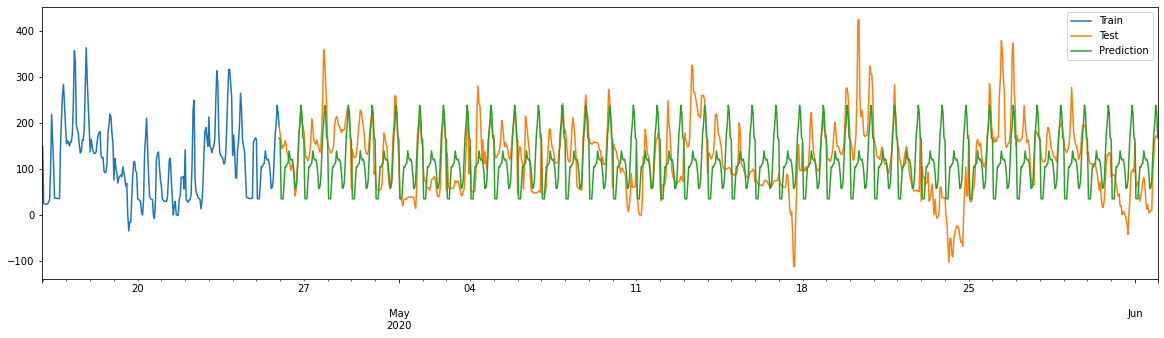

In [24]:
# Plot the actual values (train and test) and predicted valuesw
fig, ax = plt.subplots(figsize = (20,5))

data_naive_start.loc['2020-04-15 23:00:00':'2020-04-25 23:00:00']["DK1"].plot(ax=ax)   #Train data platted
g.loc[:'2020-06-01 23:00:00']["DK1"].plot(ax=ax)      # Test data plotted. Insert .loc[:'2020-06-01 23:00:00'] to make graph better

g.loc[:'2020-06-01 23:00:00']["Naive forecast"].plot(ax=ax,xlabel='')  #Forecasts plotted. Inster .loc[:'2020-06-01 23:00:00'] to make graph better

ax.legend(["Train","Test","Prediction"]);

plt.show()